In [6]:
import json
import datetime
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
# Текущая рабочая директория
current_dir = os.getcwd()
# Корневая директория проекта (если Run_jupiter_notebook находится на одном уровне с другими папками)
ROOT_DIR = os.path.abspath(os.path.join(current_dir, os.pardir))
# Добавляем корневую директорию в sys.path
sys.path.append(ROOT_DIR)

from statistical_processing.statistical_processing import StatisticalProces

In [8]:
SOURCE_DIR = 'Путь папки с исходными данными'
DEST_DIR = 'Путь куда сохранять'

statProces = StatisticalProces()

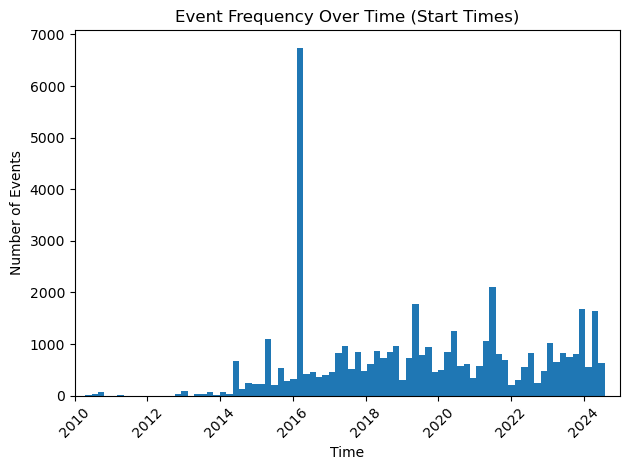

In [3]:
with open(SOURCE_DIR + "\\dict_all_dates.json", "r") as f:
    data = json.load(f)

event_start_times = []
event_start_times_dict = {}
messages = []
for event_id, event_data in data.items():
    start_time, isValid, message = statProces.date_validation_two(event_data["start_date"], event_data["end_date"])
    if isValid:
        event_start_times.append(start_time)
        event_start_times_dict[event_id] = start_time
        if message != "":
            messages.append(event_id + ": " + message)
    else:
        messages.append(event_id + ": " + message)

# Save the messages to a file
with open(DEST_DIR + "\\messages.txt", "w") as f:
    for message in messages:
        f.write(message + "\n")


# Create histogram of event start times
plt.hist(event_start_times, bins=25*12) 
plt.xlabel("Time")
plt.ylabel("Number of Events")
plt.title("Event Frequency Over Time (Start Times)")
plt.xticks(rotation=45)
plt.tight_layout()
# Set x-axis range to display years 2014 to 2024
plt.xlim(datetime.datetime(2010, 1, 1), datetime.datetime(2024, 12, 31))
# plt.ylim(0, 3000)

plt.show()

Number of events with zero delta time: 30460
Number of events with delta time beyond 30 seconds: 8
Number of events with delta time betwen 3.2 to 30 seconds: 102


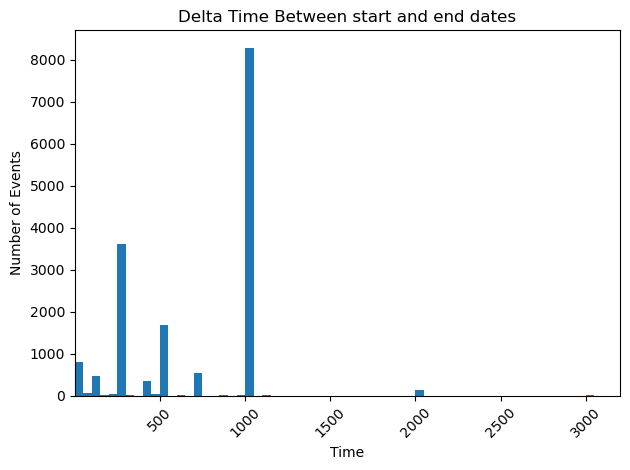

In [5]:

with open(SOURCE_DIR + "\\dict_all_dates.json", "r") as f:
    data = json.load(f)

event_delta_times = []
zero_quantity = 0
beyond_range_quantity = 0
betwen_range_quantity = 0

messages = []
for event_id, event_data in data.items():
    start_time, isValid_start, message_start = statProces.date_validation_two(event_data["start_date"], event_data["end_date"])
    if isValid_start:
        if message_start != "":
            messages.append(event_id + ": " + message_start)
        
        end_time, isValid_end, message_end = statProces.date_validation_one(event_data["end_date"])
        if isValid_end:
            delta = int((end_time - start_time).total_seconds()*1000)
            if delta == 0:
                zero_quantity += 1
                continue
            elif delta > 30000:
                beyond_range_quantity += 1
                continue
            elif delta > 3200:
                betwen_range_quantity += 1
                continue
            else:
                event_delta_times.append(delta) # переводится в миллисекундах
        else:
            messages.append(event_id + ": " + message_end)
    else:
        messages.append(event_id + ": " + message_start)

# Save the messages to a file
with open(DEST_DIR + "\\messages_delta.txt", "w") as f:
    for message in messages:
        f.write(message + "\n")
        
print("Number of events with zero delta time:", zero_quantity)
print("Number of events with delta time beyond 30 seconds:", beyond_range_quantity)
print("Number of events with delta time betwen 3.2 to 30 seconds:", betwen_range_quantity)

bins = np.arange(0, 3201, 50)
# Create histogram of event start times
plt.hist(event_delta_times, bins=bins) 
plt.xlabel("Time")
plt.ylabel("Number of Events")
plt.title("Delta Time Between start and end dates")
plt.xticks(rotation=45)
plt.tight_layout()
# Set x-axis range to display years 2014 to 2024
plt.xlim(1, 3200)
# plt.ylim(0, 3000)

plt.show()

In [10]:
# Подсчёт осциллограмм с конкретной частотой сети и шагом дискретизации
answer = statProces.frequency_statistics(source_dir=SOURCE_DIR, threshold=0.1, isPrintMessege=False)

We count the total number of files in the source directory...
Total number of files: 8794, starting processing...


Grouping by sampling rate and network: 100%|██████████| 8794/8794 [00:00<00:00, 15519.59it/s]

Network: -1
	Rate: -1, Count: 280
	Rate: 599, Count: 51
Network: 49
	Rate: 2000, Count: 5
Network: 50
	Rate: 1000, Count: 1177
	Rate: 1600, Count: 1105
	Rate: 1200, Count: 364
	Rate: -1, Count: 329
	Rate: 600, Count: 196
	Rate: 2000, Count: 129
	Rate: 1800, Count: 126
	Rate: 800, Count: 39
	Rate: 2400, Count: 12
	Rate: 900, Count: 12
	Rate: 500, Count: 8
	Rate: 2398, Count: 7
	Rate: 599, Count: 5
	Rate: 5000, Count: 4
	Rate: 3200, Count: 3
	Rate: 1220, Count: 1
	Rate: 1599, Count: 1
	Rate: 500000, Count: 1
	Rate: 6400, Count: 1
	Rate: 801, Count: 1
Network: 60
	Rate: 599, Count: 1
Total count: 3858
